# 課程目標:
    
    了解MLP 在神經網路上的應用

# 範例重點:
    以Keras 自帶的 手寫辨識的數據集來說明 MLP 建構的網路模型

# 資料預處理

In [1]:
import tensorflow as tf

# 屏蔽 tensorflow 的 deprecated warning
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [2]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [3]:
#載入手寫辨識的資料集
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

In [4]:
#指定測試集與訓練資料集
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [5]:
# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [6]:
#把LABEL轉成NUMERICAL Categorical 
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [7]:
from keras.models import Sequential
from keras.layers import Dense

In [8]:
#宣告採用序列模型
model = Sequential()

In [9]:
#建構輸入層
model.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))

In [10]:
#建構輸出層
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))

In [11]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


# 訓練模型

In [12]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [13]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=20, batch_size=32,verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 11s 220us/step - loss: 0.2700 - acc: 0.9223 - val_loss: 0.1332 - val_acc: 0.9611
Epoch 2/20
48000/48000 [==============================] - 9s 182us/step - loss: 0.1080 - acc: 0.9681 - val_loss: 0.1066 - val_acc: 0.9679
Epoch 3/20
48000/48000 [==============================] - 7s 156us/step - loss: 0.0715 - acc: 0.9778 - val_loss: 0.0933 - val_acc: 0.9728
Epoch 4/20
48000/48000 [==============================] - 8s 156us/step - loss: 0.0514 - acc: 0.9840 - val_loss: 0.0834 - val_acc: 0.9758
Epoch 5/20
48000/48000 [==============================] - 7s 156us/step - loss: 0.0371 - acc: 0.9885 - val_loss: 0.0798 - val_acc: 0.9760 0.98 - ETA: 3s - lo
Epoch 6/20
48000/48000 [==============================] - 8s 167us/step - loss: 0.0271 - acc: 0.9915 - val_loss: 0.0761 - val_acc: 0.9784
Epoch 7/20
48000/48000 [==============================] - 8s 170us/step - loss: 0.0202 - acc: 0.9938 

# 以圖形顯示訓練過程

In [14]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.figure(figsize=(10, 4))
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

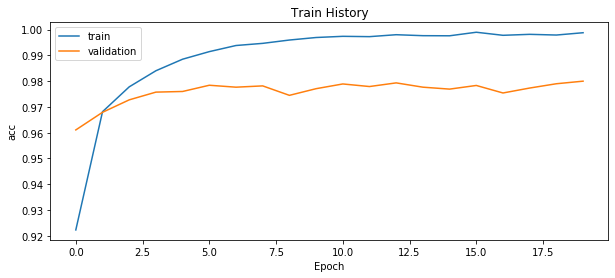

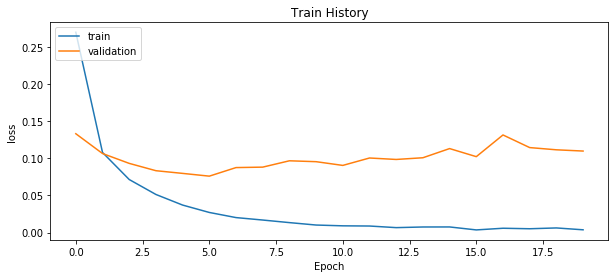

In [15]:
show_train_history(train_history,'acc', 'val_acc')
show_train_history(train_history,'loss', 'val_loss')

# 評估模型準確率

In [16]:
loss, acc = model.evaluate(x_Test_normalize, y_Test_OneHot)
print('accuracy=', acc)

10000/10000 [==============================] - 1s 56us/step
accuracy= 0.9819


---
# 作業目標:
利用手寫辨識資料說明MLP 中, 神經網路層的多寡跟預測結果的差異
# 作業重點:
[練習]請嘗試新增一層或兩層看看最後預測結果是否有差異
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))


In [17]:
model = Sequential()
model.add(Dense(units=512, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))
model.add(Dense(units=256, 
                kernel_initializer='normal', 
                activation='relu'))
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])
train_history = model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=20, batch_size=32,verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 11s 223us/step - loss: 0.2102 - acc: 0.9376 - val_loss: 0.1062 - val_acc: 0.9677
Epoch 2/20
48000/48000 [==============================] - 10s 217us/step - loss: 0.0854 - acc: 0.9739 - val_loss: 0.1003 - val_acc: 0.9704
Epoch 3/20
48000/48000 [==============================] - 11s 238us/step - loss: 0.0568 - acc: 0.9819 - val_loss: 0.0988 - val_acc: 0.9731
Epoch 4/20
48000/48000 [==============================] - 10s 218us/step - loss: 0.0434 - acc: 0.9856 - val_loss: 0.0937 - val_acc: 0.9739
Epoch 5/20
48000/48000 [==============================] - 12s 250us/step - loss: 0.0323 - acc: 0.9889 - val_loss: 0.1078 - val_acc: 0.9724
Epoch 6/20
48000/48000 [==============================] - 10s 210us/step - loss: 0.0272 - acc: 0.9913 - val_loss: 0.1134 - val_acc: 0.9728
Epoch 7/20
48000/48000 [==============================] - 10s 209us/step - loss: 0.0242 - acc: 0.9921 - val_loss: 0.

10000/10000 [==============================] - 1s 54us/step
accuracy= 0.9827


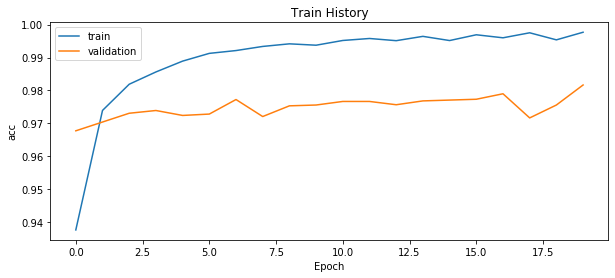

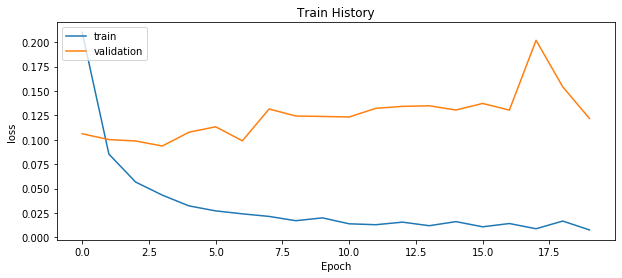

In [18]:
loss, acc = model.evaluate(x_Test_normalize, y_Test_OneHot)
print('accuracy=', acc)
show_train_history(train_history,'acc', 'val_acc')
show_train_history(train_history,'loss', 'val_loss')
